In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = r"dataset\Housing.csv"
df = pd.read_csv(path)
raw_df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Columns description
| Column | Description |
|:------------|:-----------------------------------------|
| **Price** | The price of the house. |
| **Area** | The total area of the house in square feet. |
| **Bedrooms** | The number of bedrooms in the house. |
| **Bathrooms** | The number of bathrooms in the house. |
| **Stories** | The number of stories in the house. |
| **Mainroad** | Whether the house is connected to the main road **(Yes/No)**. |
| **Guestroom** | Whether the house has a guest room **(Yes/No)**. |
| **Basement** | Whether the house has a basement **(Yes/No)**. |
| **Hot water heating**   | Whether the house has a hot water heating system **(Yes/No)**. |
| **Airconditioning** | Whether the house has an air conditioning system **(Yes/No)**. |
| **Parking** | The number of parking spaces available within the house. |
| **Prefarea** | Whether the house is located in a preferred area **(Yes/No)**. |
| **Furnishing status** | The furnishing status of the house **(Fully Furnished, Semi-Furnished, Unfurnished)**. |

### Convert feet to meters

In [3]:
df.area = df.area / 10.764

### Rearrange columns

In [4]:
df = df[
    [
        "price",
        "area",
        "prefarea",
        "stories",
        # "total_rooms",
        "bedrooms",
        "bathrooms",
        "guestroom",
        "basement",
        "mainroad",
        "parking",
        "hotwaterheating",
        "airconditioning",
        "furnishingstatus",
    ]
]

In [5]:
df.describe()

,price,area,stories,bedrooms,bathrooms,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,478.496961,1.805505,2.965138,1.286239,0.693578
std,1.870440e+06,201.611020,0.867492,0.738064,0.502470,0.861586
min,1.750000e+06,153.288740,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,334.448161,1.000000,2.000000,1.000000,0.000000
50%,4.340000e+06,427.350427,2.000000,3.000000,1.000000,0.000000
75%,5.740000e+06,590.858417,2.000000,3.000000,2.000000,1.000000
max,1.330000e+07,1505.016722,4.000000,6.000000,4.000000,3.000000


## Filter data frame by: 
- dropping duplicates 
- replacing nulls with `mean()` value of column
- encode non-numeric columns

In [6]:
from first_attempt_tech_task import pd_dataset_utils
df = pd_dataset_utils.drop_duplicates(df)
df = pd_dataset_utils.handle_nulls(df)
df = pd_dataset_utils.encode_pd_df(df)

### `describe()` including encoded values

In [7]:
df.describe()

,price,area,prefarea,stories,bedrooms,bathrooms,guestroom,basement,mainroad,parking,hotwaterheating,airconditioning,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,478.496961,0.234862,1.805505,2.965138,1.286239,0.177982,0.350459,0.858716,0.693578,0.045872,0.315596,1.069725
std,1.870440e+06,201.611020,0.424302,0.867492,0.738064,0.502470,0.382849,0.477552,0.348635,0.861586,0.209399,0.465180,0.761373
min,1.750000e+06,153.288740,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,334.448161,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,427.350427,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,590.858417,0.000000,2.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,1.330000e+07,1505.016722,1.000000,4.000000,6.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000


## Get correlation between columns

In [8]:
correlation_method = 'pearson'  # pearson, spearman, kendall
correlation = df.corr(method=correlation_method)

<Axes: >

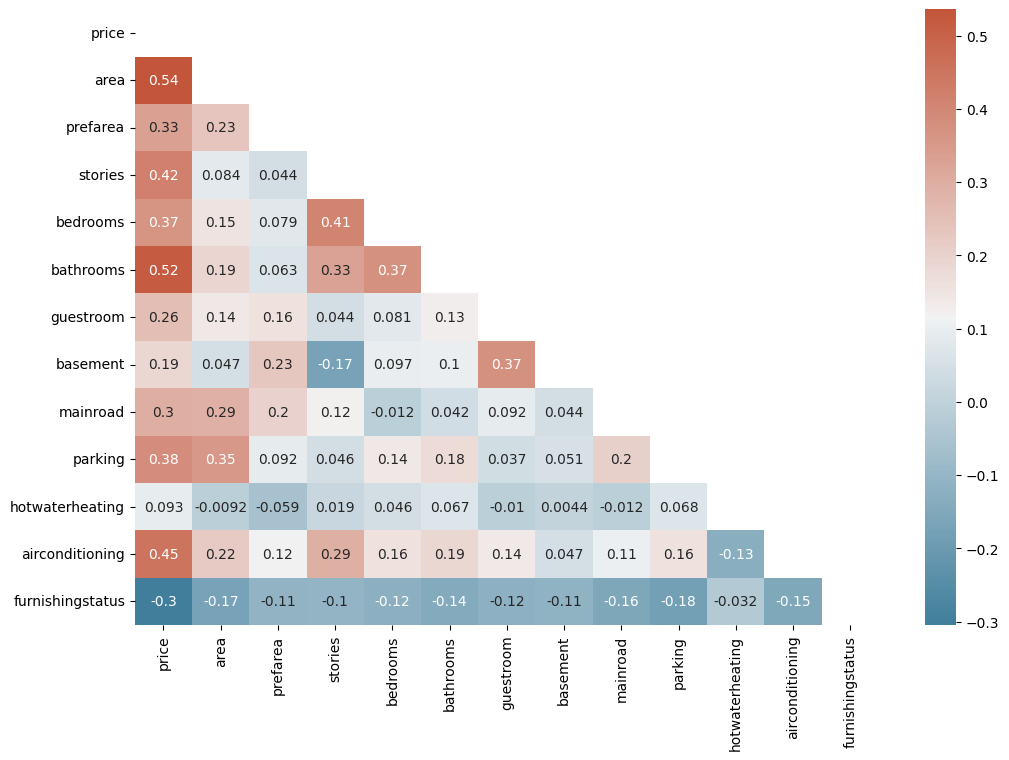

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, annot=True, mask = mask, cmap=cmap)

## Print correlation between all columns and 'price' column in sorted order

In [10]:
def get_column_correlation(df, target):
    correlation_dict = {}
    for column in df.columns:
        if column == target: 
            continue
        corr = df[target].corr(df[column], correlation_method)
        correlation_dict[column] = corr
    return dict(sorted(correlation_dict.items(), key=lambda x: x[1], reverse=True))

target = 'price'
price_correlation_dict = get_column_correlation(df, target)
for col, corr in price_correlation_dict.items():
    print(f"{target} vs {col}: {corr:.3f}")

price vs area: 0.536
price vs bathrooms: 0.518
price vs airconditioning: 0.453
price vs stories: 0.421
price vs parking: 0.384
price vs bedrooms: 0.366
price vs prefarea: 0.330
price vs mainroad: 0.297
price vs guestroom: 0.256
price vs basement: 0.187
price vs hotwaterheating: 0.093
price vs furnishingstatus: -0.305


In [11]:
target = 'prefarea'
prefarea_correlation_dict = get_column_correlation(df, target = target)
for col, corr in prefarea_correlation_dict.items():
    print(f"{target} vs {col}: {corr:.3f}")

prefarea vs price: 0.330
prefarea vs area: 0.235
prefarea vs basement: 0.228
prefarea vs mainroad: 0.200
prefarea vs guestroom: 0.161
prefarea vs airconditioning: 0.117
prefarea vs parking: 0.092
prefarea vs bedrooms: 0.079
prefarea vs bathrooms: 0.063
prefarea vs stories: 0.044
prefarea vs hotwaterheating: -0.059
prefarea vs furnishingstatus: -0.108


## Plot distribution of values for 'price' column and columns with high correlation to 'price'

In [12]:
def plot_distribution(df, features, figsize=(12, 15)):
    plt.figure(figsize=figsize)

    for i, feature in enumerate(features, 1):
        plt.subplot(len(features), 2, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f"distribution for '{features[i-1]}'")
        plt.xlabel(feature.capitalize())
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

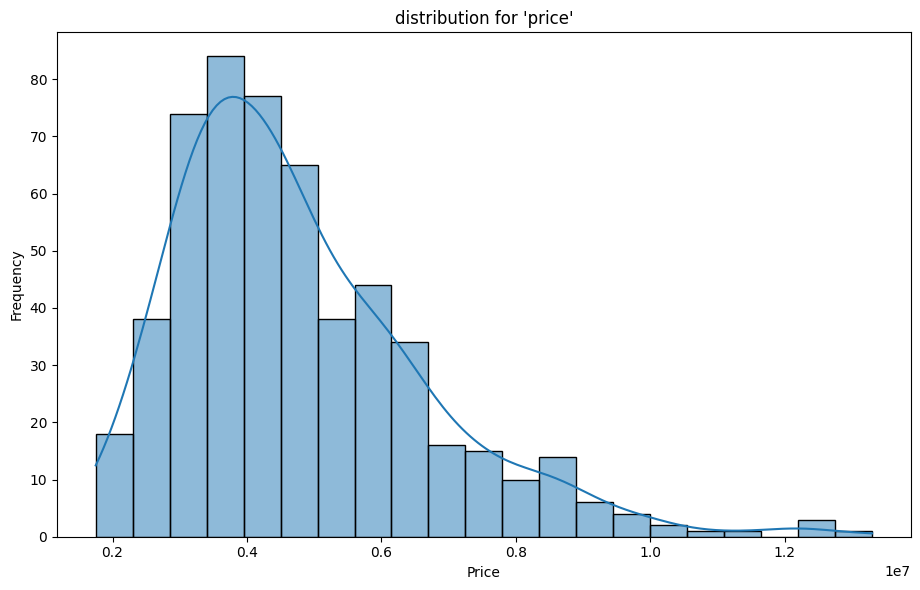

In [13]:
plot_distribution(df, ['price'], figsize=(18, 6))

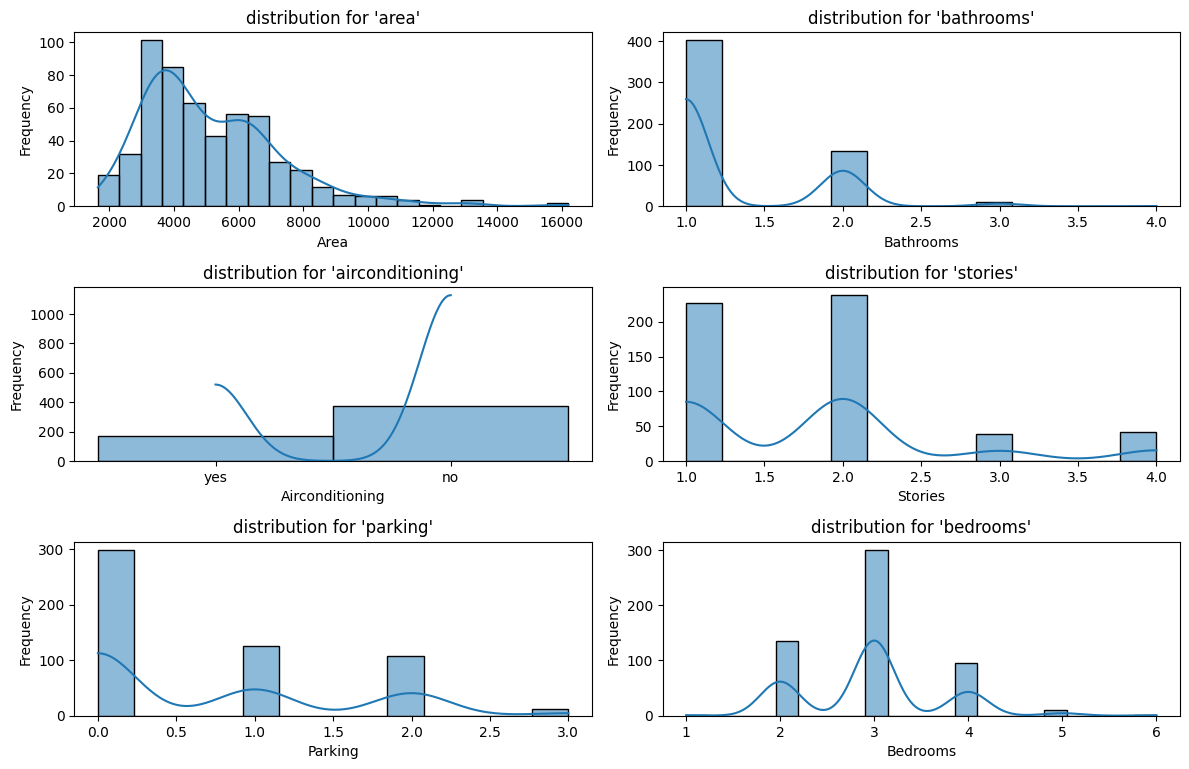

In [14]:
features = list(price_correlation_dict.keys())[:6]
plot_distribution(raw_df, features)

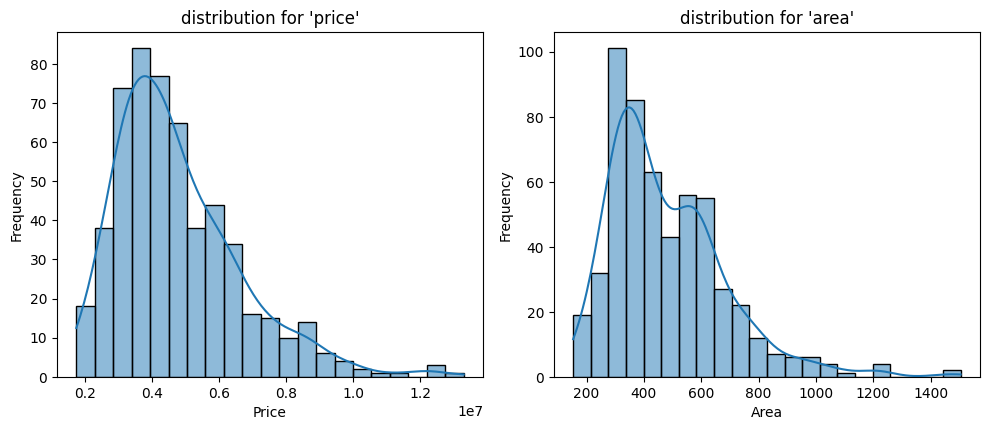

In [15]:
list(price_correlation_dict.keys())
features = ["price", 'area']
plot_distribution(df, features, figsize=(10, 8))

### Plotting outliers

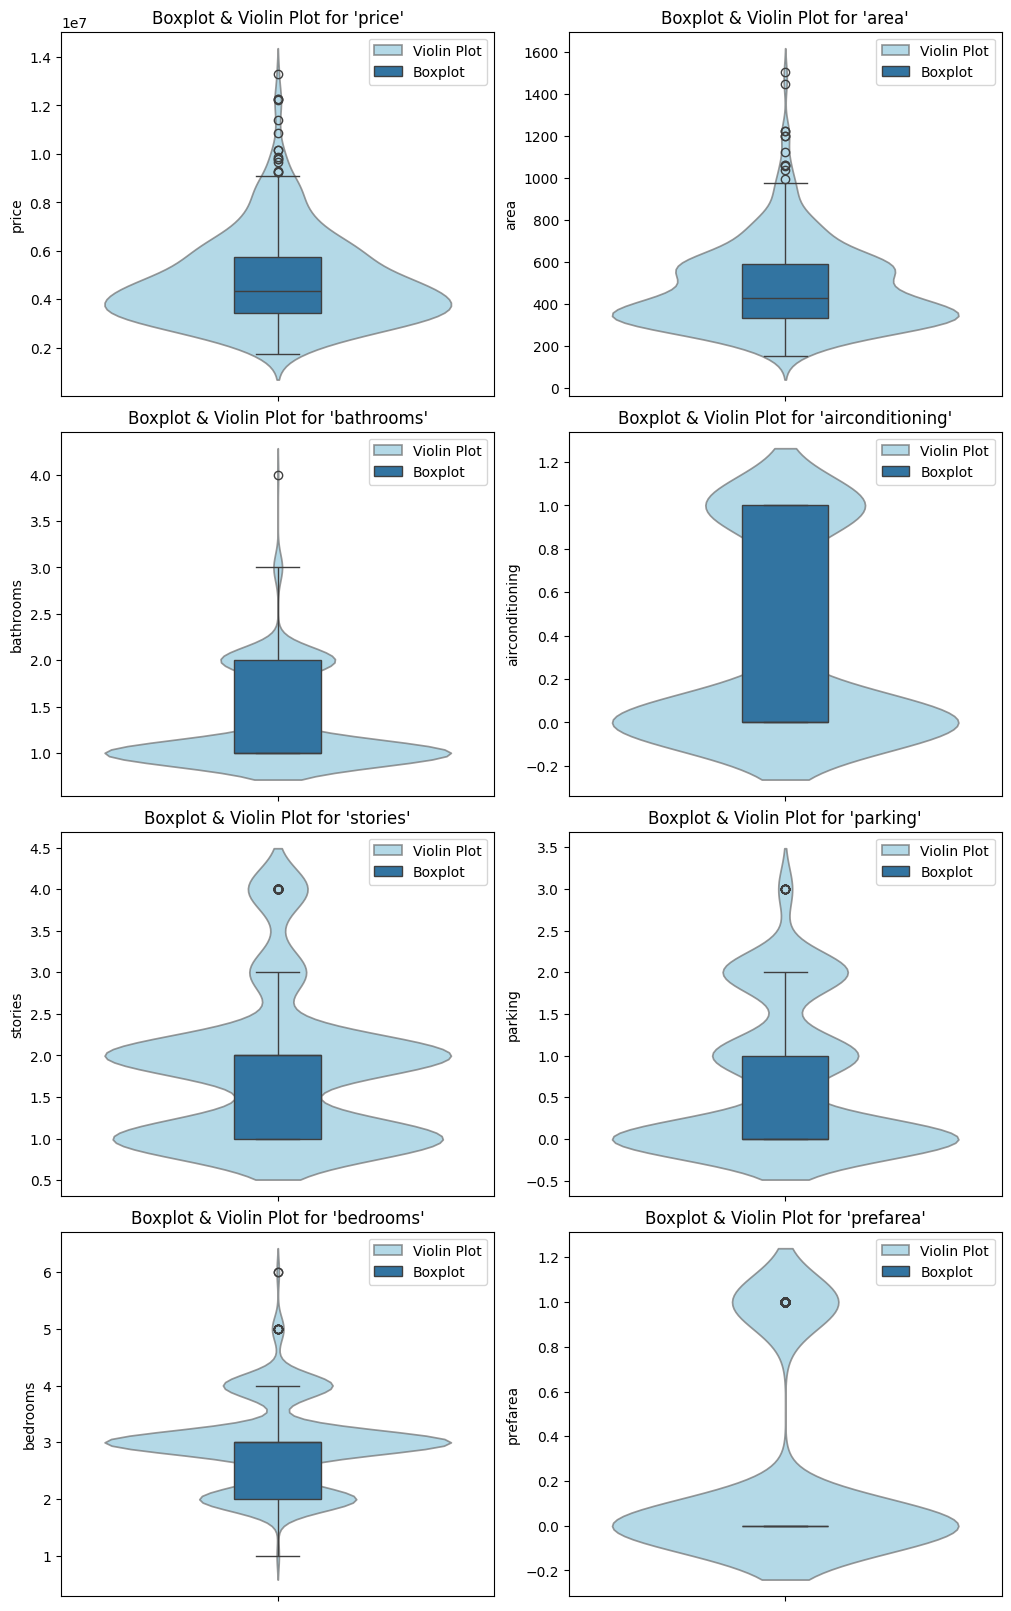

In [16]:
import math
features = ['price'] + list(price_correlation_dict.keys())[:7]

cols = 2
rows = math.ceil(len(features) / cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows), constrained_layout=True)
axes = axes.flatten()

for i, feature in enumerate(features):
 
    sns.violinplot(y=df[feature], color="skyblue", inner=None, ax=axes[i], alpha=0.7, label="Violin Plot")
    sns.boxplot(y=df[feature], width=0.2, ax=axes[i], label="Boxplot")
    axes[i].set_title(f"Boxplot & Violin Plot for '{feature}'")

# Turn off unused subplots
for j in range(len(features), len(axes)):
    axes[j].axis('off')

plt.show()


In [17]:
def get_outliers(df, column, threshold = 1):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{outliers.shape[0]} outliers for '{column}' at {threshold=} ")
    return outliers

12 outliers for 'price' at threshold=1.7 
Number of outliers: 12


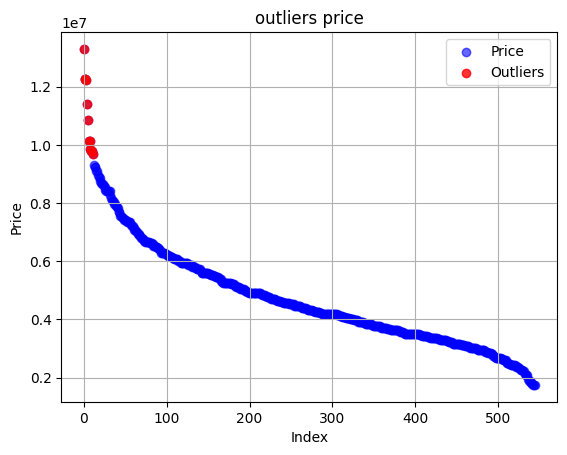

In [18]:
outliers= get_outliers(df, column='price',threshold = 1.7)
print(f"Number of outliers: {outliers.shape[0]}")

plt.scatter(df.index, df['price'], color='blue', label='Price', alpha=0.6)
plt.scatter(outliers.index, outliers['price'], color='red', label='Outliers', alpha=0.8)
plt.title('outliers price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Deleting outliers from price column

36 outliers for 'price' at threshold=1 


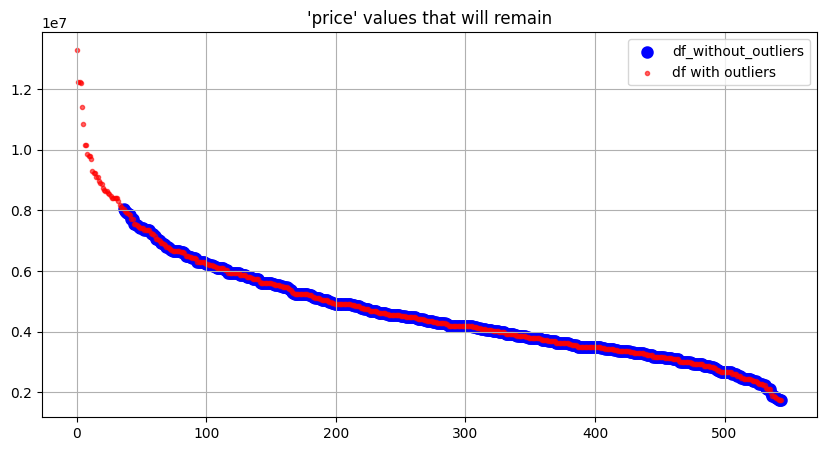

In [19]:
target = 'price'
outliers = get_outliers(df, column=target,threshold = 1)
df = df.drop(outliers.index)

plt.figure(figsize=(10,5))

plt.scatter(df.index, df[target], color='blue', label='df_without_outliers', lw=3)
plt.scatter(raw_df.index, raw_df[target], color='red', label='df with outliers', alpha=0.6, marker=".")

plt.title(f"'{target}' values that will remain")
plt.legend()
plt.grid()
plt.show()

28 outliers for 'area' at threshold=1.1 


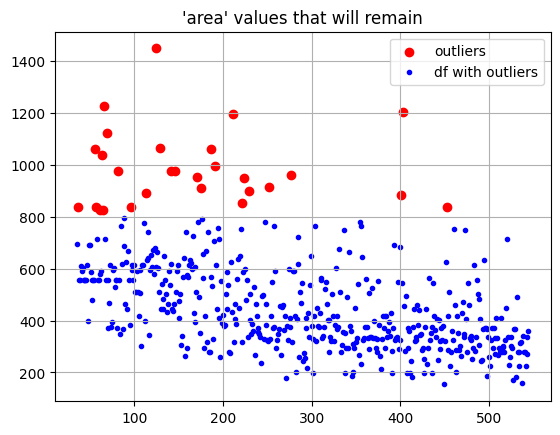

In [20]:
target = 'area'
outliers = get_outliers(df, column=target, threshold = 1.1)
df = df.drop(outliers.index)


plt.scatter(outliers.index, outliers[target], color='red', label='outliers')
plt.scatter(df.index, df[target], color='blue', label='df with outliers',  marker=".")

plt.title(f"'{target}' values that will remain")
plt.legend()
plt.grid()
plt.show()

## Training process

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

### Features will be first 7 columns with higest correlation
### Target 'price' column

In [22]:
for i, (col, corr) in enumerate(price_correlation_dict.items()):
    print(f"[{i}] {target} vs {col}: {corr=}")

# drop_axis = ['airconditioning', 'stories', 'mainroad', ]
# df = df.drop(drop_axis, axis=1)
# df.describe()

[0] area vs area: corr=0.5359973457780799
[1] area vs bathrooms: corr=0.5175453394550115
[2] area vs airconditioning: corr=0.45295408425604866
[3] area vs stories: corr=0.42071236618861685
[4] area vs parking: corr=0.3843936486357261
[5] area vs bedrooms: corr=0.3664940257738684
[6] area vs prefarea: corr=0.3297770498681074
[7] area vs mainroad: corr=0.29689848926397633
[8] area vs guestroom: corr=0.2555172899350004
[9] area vs basement: corr=0.18705659793805288
[10] area vs hotwaterheating: corr=0.093072843921397
[11] area vs furnishingstatus: corr=-0.30472146153743424


In [23]:
X = df.drop(list(price_correlation_dict.keys())[7:] + ["price"], axis=1)
y = df.price

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

y_scaler = StandardScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [30]:
def evaluate(y_test, y_pred, model=None):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"mse         = {mean_squared_error(y_test, y_pred)} ")
    print(f"mae         = {mean_absolute_error(y_test, y_pred)} ")
    print(f"r2          = {r2_score(y_test, y_pred)} ")
    print(f"cv_mean     = {cv_scores.mean()} ")
    print(f"cv_std      = {cv_scores.std()} ")
    

models = {
    "LinearRegression" :LinearRegression(),
    "RandomForestRegressor" :RandomForestRegressor(n_estimators=300, random_state=42),
    "Ridge" :Ridge(alpha=1.0),
    "Lasso" : Lasso(alpha=1.0),
}
models_result = {}

for model_name, model in models.items():
    print(f"\n'{model_name}'")

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(f"model.score = {model.score(X_test, y_test):.4f}")
    evaluate(y_test, y_pred, model)
    
    models_result[model_name] = (model, y_test, y_pred)



'LinearRegression'
model.score = 0.5654
mse         = 0.5059427874264405 
mae         = 0.5339949864872718 
r2          = 0.5654472815965319 
cv_mean     = -11.075123508510268 
cv_std      = 2.8923837389096443 

'RandomForestRegressor'
model.score = 0.5004
mse         = 0.5816337337264598 
mae         = 0.5820175705140077 
r2          = 0.5004365584661297 
cv_mean     = -13.888918873122673 
cv_std      = 4.369446955439039 

'Ridge'
model.score = 0.5651
mse         = 0.5063779311411443 
mae         = 0.5341909135084032 
r2          = 0.56507353798595 
cv_mean     = -11.033485717718772 
cv_std      = 2.8426099081244156 

'Lasso'
model.score = -0.0114
mse         = 1.1775419837750942 
mae         = 0.8915851562947256 
r2          = -0.011387221639318046 
cv_mean     = -18.615621061735684 
cv_std      = 14.202655054602577 


## low model score :(

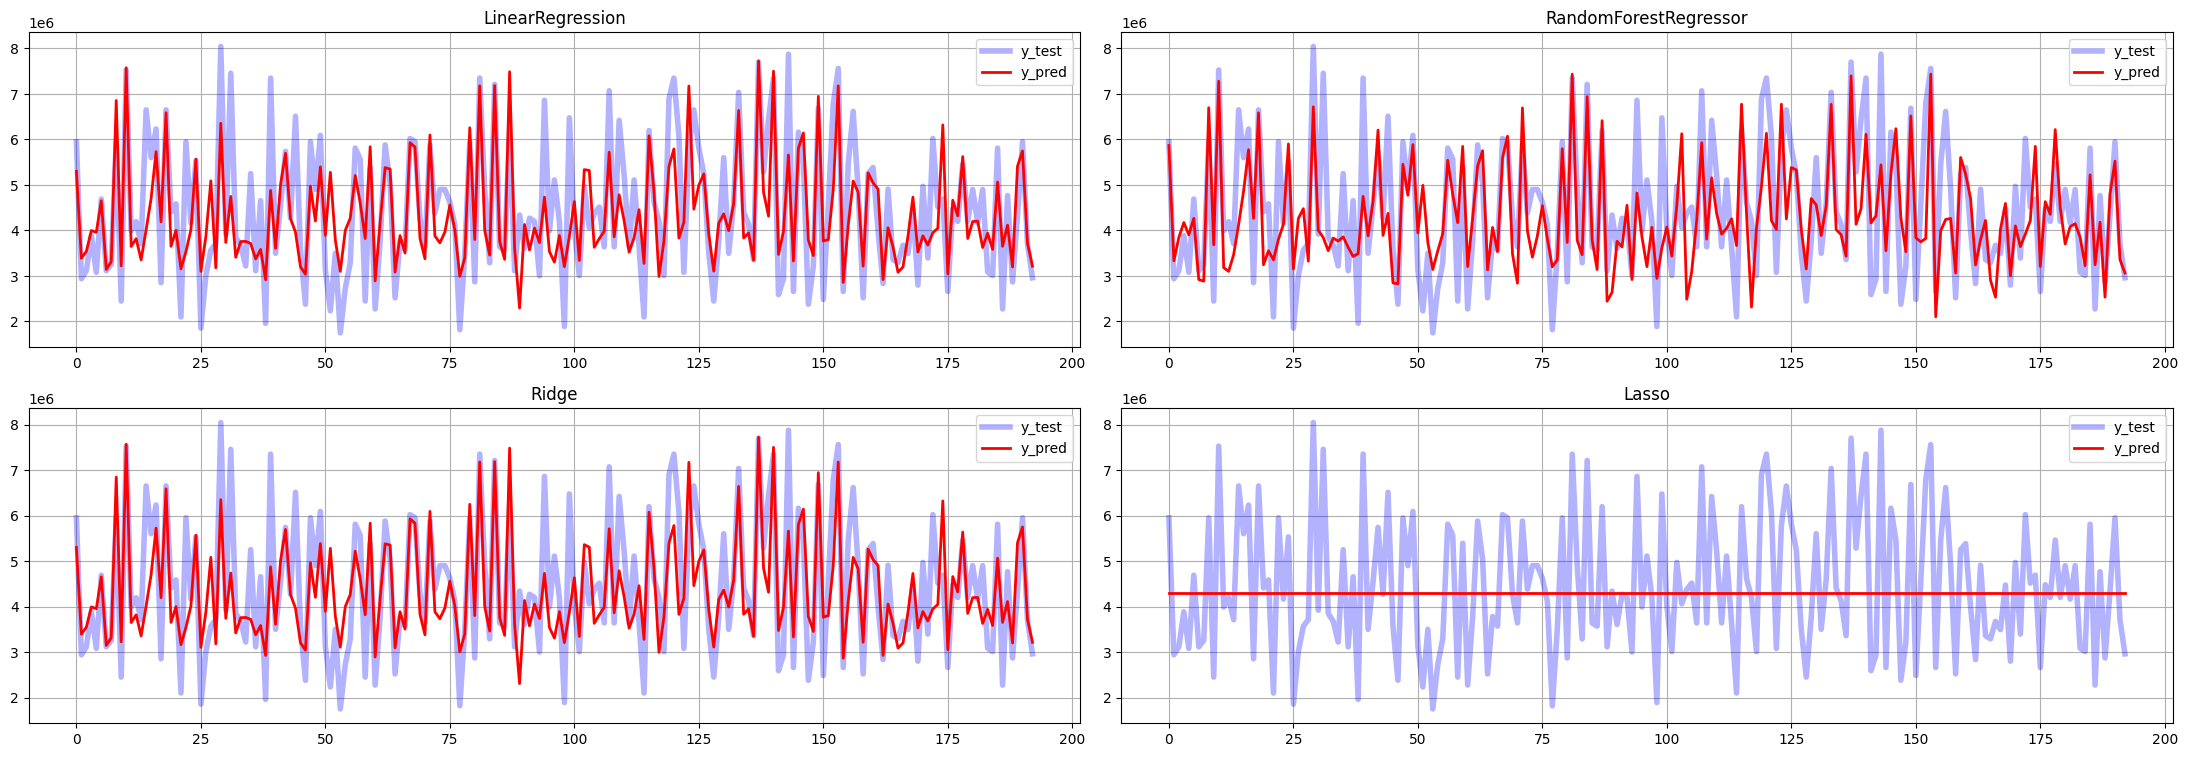

In [25]:
plt.figure(figsize=(22, 30))
alpha = .5
for i, (model_name, (_, y_test, y_pred)) in enumerate(models_result.items(), 1):
    print()
    y_test_unscaled = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_unscaled = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    plt.subplot(len(features), 2, i)
    plt.plot(y_test_unscaled, alpha=0.3, color="blue", label = 'y_test', lw=4)
    plt.plot(y_pred_unscaled, alpha=1, color="red", label = 'y_pred', lw=2)

    plt.title(model_name)
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


In [26]:
for i, (model_name, (model, y_test, y_pred)) in enumerate(models_result.items(), 1):
    try:
        coefficients = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': model.coef_
        })
        coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

        plt.figure(figsize=(10, 6))
        plt.barh(coefficients['Feature'], coefficients['Coefficient'])
        plt.title("Feature Importance (Linear Regression Coefficients)")
        plt.xlabel("Coefficient Value")
        plt.ylabel("Feature")
    except:
        ...
plt.show()
